# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](https://webcache.googleusercontent.com/search?q=cache:stAVPik6onEJ:yann.lecun.com/exdb/mnist) and include:

88% [Lecun et al., 1998](https://hal.science/hal-03926082/document)

95.3% [Lecun et al., 1998](https://hal.science/hal-03926082v1/document)

99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)


MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Installation

In [1]:
# Update the PATH to include the user installation directory. 
import os
os.environ['PATH'] = f"{os.environ['PATH']}:/root/.local/bin"

# Restart the Kernel before you move on to the next step.

#### Important: Restart the Kernel before you move on to the next step.

In [15]:
# Install requirements
!python -m pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable


## Imports

In [6]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import numpy as np
from torch.utils.data import random_split

In [22]:
pip --upgrade ipywidgets 


Usage:   
  /opt/conda/bin/python -m pip <command> [options]

no such option: --upgrade
Note: you may need to restart the kernel to use updated packages.


## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [3]:

# Define transforms
flatten_transform = transforms.Lambda(lambda x:torch.flatten(x))
train_transformations = transforms.Compose([
    transforms.RandomRotation(degrees=30),
    transforms.ToTensor(),
    transforms.Normalize((0.485,), (0.229,)),
    flatten_transform
])
test_transformations = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.485,), (0.229,)),
    flatten_transform
])

# Visualization dataset 
vis_dataset = torchvision.datasets.MNIST(root ="MNIST/raw/train-images-idx3-ubyte", train = True, download = True, transform = transforms.ToTensor())
# Create training set and define training dataloader
train_dataset = torchvision.datasets.MNIST(root ="MNIST/raw/train-images-idx3-ubyte", train = True, transform = train_transformations, download = True)


# Create test set and define test dataloader
test_dataset = torchvision.datasets.MNIST(root = "MNIST/raw/t10k-images-idx3-ubyte", train = False, transform = test_transformations, download = True)

/opt/conda/lib/python3.7/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:178.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [7]:
test_dataloader = DataLoader(test_dataset, batch_size = 64, shuffle = True)
vis_dataloader = DataLoader(vis_dataset, batch_size = 64, shuffle = True)
train_size = int(0.8 * len(train_dataset))  # 80% for training
val_size = len(train_dataset) - train_size   # 20% for validation
train_dataset, val_dataset = random_split(train_dataset, [train_size, val_size])
# Create data loaders
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
val_dataloader = torch.utils.data.DataLoader(val_dataset, batch_size=64, shuffle=False)

## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

First I transformed the images to tensors, so that they get the right shape for the next transformations, I normalized the images so that the pixels value range is comprised in a value range that doesn't cause the vanishing gradient during training. For the training data I flipped the images so that the model learns from a variety of instances, finally I flattened the tensors to get one dimensional inputs instead of three dimensional which is required by the neural network.

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [8]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

5


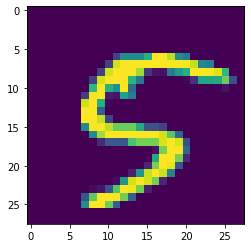

5


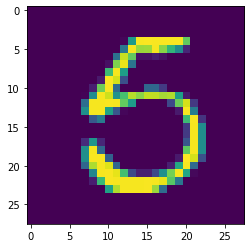

9


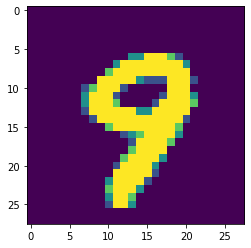

1


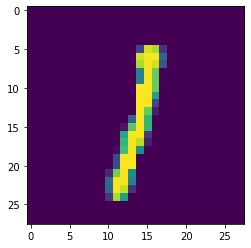

3


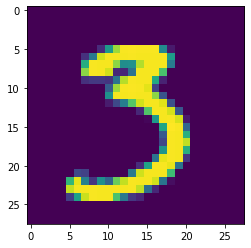

In [9]:
# Explore data
show5(vis_dataloader)

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [20]:
## YOUR CODE HERE ##
class DigitsModel(nn.Module) :
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784,128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64,10)
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    def test(self,x):
        x = self.forward(x)
        y = F.softmax(x, dim = 1)
        return y 
        

Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [21]:
## YOUR CODE HERE ##
model = DigitsModel()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters() , lr=0.001)

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [22]:
## YOUR CODE HERE ##
epochs = 5 
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
avg_loss = []
val_losses = []
val_accuracies = []

for epoch in range(epochs) :
    model.train()
    iteration = 0
    epoch_loss = 0
    iter_loss = []
    for images, labels in train_dataloader : 
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model.forward(images)
        loss = criterion(outputs, labels)
        loss.backward()
        
        optimizer.step()
        iteration += 1
        iter_loss.append(loss.item()) 
        if iteration % 5000 == 0: 
            print(f'loss at iteration {iteration} is {loss.item()}')
    
    epoch_loss = sum(iter_loss) / len(iter_loss)
    avg_loss.append(epoch_loss)
    
    model.eval()
    val_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in val_dataloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    val_loss /= len(val_dataloader) 
    val_losses.append(val_loss)
    accuracy = correct / total 
    val_accuracies.append(accuracy)
    print(f'Epoch [{epoch+1}/{epochs}], Train Loss: {epoch_loss:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {accuracy:.4f}')

Epoch [1/5], Train Loss: 0.5333, Val Loss: 0.3309, Val Accuracy: 0.8978
Epoch [2/5], Train Loss: 0.2790, Val Loss: 0.2541, Val Accuracy: 0.9204
Epoch [3/5], Train Loss: 0.2238, Val Loss: 0.2070, Val Accuracy: 0.9345
Epoch [4/5], Train Loss: 0.1896, Val Loss: 0.1953, Val Accuracy: 0.9409
Epoch [5/5], Train Loss: 0.1726, Val Loss: 0.1991, Val Accuracy: 0.9336


Plot the training loss (and validation loss/accuracy, if recorded).

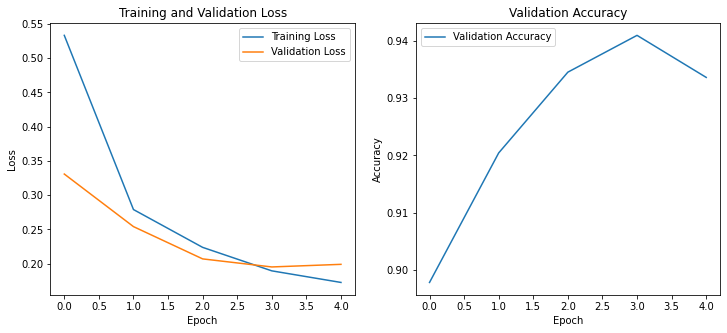

In [23]:
## YOUR CODE HERE ##
plt.figure(figsize=(12, 5))

# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(avg_loss, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot validation accuracy
plt.subplot(1, 2, 2)
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy')
plt.legend()

plt.show()

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 90%, great work, but see if you can push a bit further! 
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [24]:
## YOUR CODE HERE ##
model.eval()

correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_dataloader:
        images, labels = images.to(device), labels.to(device)
        
        outputs = model.test(images)
        _, predicted = torch.max(outputs, 1)
        
        correct += (predicted == labels).sum().item()
        
        # Increment total samples
        total += labels.size(0)

# Compute accuracy
accuracy = 100 * correct / total
print(f'Accuracy on the test set: {accuracy:.2f}%')
   

Accuracy on the test set: 95.69%


## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

In [25]:
## YOUR CODE HERE ##
optimizer = torch.optim.Adam(model.parameters() , lr=0.0001)
epochs = 5 
avg_loss = []
val_losses = []
val_accuracies = []

for epoch in range(epochs) :
    model.train()
    iteration = 0
    epoch_loss = 0
    iter_loss = []
    for images, labels in train_dataloader : 
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model.forward(images)
        loss = criterion(outputs, labels)
        loss.backward()
        
        optimizer.step()
        iteration += 1
        iter_loss.append(loss.item()) 
        if iteration % 5000 == 0: 
            print(f'loss at iteration {iteration} is {loss.item()}')
    
    epoch_loss = sum(iter_loss) / len(iter_loss)
    avg_loss.append(epoch_loss)
    
    model.eval()
    val_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in val_dataloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    val_loss /= len(val_dataloader) 
    val_losses.append(val_loss)
    accuracy = correct / total 
    val_accuracies.append(accuracy)
    print(f'Epoch [{epoch+1}/{epochs}], Train Loss: {epoch_loss:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {accuracy:.4f}')

Epoch [1/5], Train Loss: 0.1241, Val Loss: 0.1406, Val Accuracy: 0.9554
Epoch [2/5], Train Loss: 0.1168, Val Loss: 0.1307, Val Accuracy: 0.9579
Epoch [3/5], Train Loss: 0.1134, Val Loss: 0.1322, Val Accuracy: 0.9593
Epoch [4/5], Train Loss: 0.1124, Val Loss: 0.1290, Val Accuracy: 0.9595
Epoch [5/5], Train Loss: 0.1046, Val Loss: 0.1306, Val Accuracy: 0.9590


In [26]:
model.eval()

correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_dataloader:
        images, labels = images.to(device), labels.to(device)
        
        outputs = model.test(images)
        _, predicted = torch.max(outputs, 1)
        
        correct += (predicted == labels).sum().item()
        
        # Increment total samples
        total += labels.size(0)

# Compute accuracy
accuracy = 100 * correct / total
print(f'Accuracy on the test set: {accuracy:.2f}%')

Accuracy on the test set: 97.17%


## Saving your model
Using `torch.save`, save your model for future loading.

In [28]:
## YOUR CODE HERE ##
torch.save(model, 'model.pth')